In [25]:
import pandas as pd
import numpy as np

In [26]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [27]:
pd.options.display.float_format = '{:.0f}'.format

In [28]:
#util function to check for ints
def check_int(value):
    try:
        int(value)
        return np.NaN
    except ValueError:
        return value

In [29]:
df=pd.read_parquet("../data/2nd_transformed_data.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coordinate                     1252 non-null   object 
 1   address                        1252 non-null   object 
 2   location_name                  1252 non-null   object 
 3   typeSummary                    1252 non-null   object 
 4   ongoing_bidding                1252 non-null   bool   
 5   foreclosure                    1252 non-null   bool   
 6   price                          1252 non-null   int32  
 7   price_per_area                 1252 non-null   int32  
 8   has_price_change               1252 non-null   bool   
 9   rooms                          1249 non-null   object 
 10  fee                            1252 non-null   int32  
 11  age                            1252 non-null   int64  
 12  deactivated_before_open_house  1252 n

In [30]:
df.sample(5)

,coordinate,address,location_name,typeSummary,ongoing_bidding,foreclosure,price,price_per_area,has_price_change,rooms,fee,age,deactivated_before_open_house,small_image_url,medium_image_url,url,state_labels,visible_project_units,broker_agency_name,locations_string,should_highlight_showings,listingId,listingType,listingPackageType,listingState,listingStatus,price_change,area,date,balcony,elevator,patio,tenure_owned,living_area,supplemental_area
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19053256,"[59.3556390499, 17.9929448066]",Ankdammsgatan 30,Solna kommun,Bostadsrättslägenhet,False,False,3995000,3995000,False,3,3781,28,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-3rum-sky...,[],0,Fastighetsbyrån Solna,"Skytteholm, Solna kommun",False,19053256,common_listing,basic,active,for_sale,NaN,solna,20221203,True,True,False,False,76,None
19038938,"[59.3322501, 18.0073693]","Hjalmar Söderbergs väg 6, 2tr",Stockholms kommun,Bostadsrättslägenhet,False,False,5995000,5995000,True,"3,5",4251,92,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,"https://www.hemnet.se/bostad/lagenhet-3,5rum-k...",[],0,SkandiaMäklarna Stockholm Kungsholmen,"Kungsholmen - Kristineberg, Stockholms kommun",False,19038938,common_listing,basic,active,for_sale,-14,kungsholmen,20221203,True,True,False,False,82,None
19369155,"[59.3264427, 18.021162]","Fyrverkarbacken 23, 10 tr.",Stockholms kommun,Bostadsrättslägenhet,False,False,2895000,2895000,False,2,2575,9,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-2rum-kun...,[],0,Notar,"Kungsholmen - Marieberg, Stockholms kommun",False,19369155,common_listing,basic,active,for_sale,NaN,kungsholmen,20221203,False,True,False,False,43,None
19303978,"[59.3483353, 18.0342159]","Anna Steckséns Gata 15, 4 tr",Stockholms kommun,Bostadsrättslägenhet,True,False,4950000,4950000,False,2,3622,29,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-2rum-vas...,"[{'category': 'state', 'identifier': 'ongoing_...",0,HusmanHagberg Vasastan,"Vasastan Hagastaden, Stockholms kommun",True,19303978,common_listing,premium,active,for_sale,NaN,vasastan,20221203,True,True,False,False,45,None
19350728,"[59.340991437838625, 18.081532369128457]",Östermalmsgatan 70,Stockholms kommun,Bostadsrättslägenhet,False,False,6000000,6000000,False,2,2209,15,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-2rum-ovr...,[],0,Lagerlings,"Övre Östermalm, Stockholms kommun",False,19350728,common_listing,basic,active,for_sale,NaN,ostermalm,20221203,False,False,False,False,57,None


In [31]:
df['living_area'].value_counts()

35     33
34     28
44     22
55     22
81     21
       ..
98      1
36      1
110     1
502     1
30      1
Name: living_area, Length: 270, dtype: int64

In [32]:
df["living_area"].value_counts(sort=True,normalize=False)

35     33
34     28
44     22
55     22
81     21
       ..
98      1
36      1
110     1
502     1
30      1
Name: living_area, Length: 270, dtype: int64

In [33]:
df['living_area'].describe()

count   1248
mean      67
std       38
min       15
25%       42
50%       60
75%       83
max      502
Name: living_area, dtype: float64

In [34]:
df.loc[df['living_area']==502]

,coordinate,address,location_name,typeSummary,ongoing_bidding,foreclosure,price,price_per_area,has_price_change,rooms,fee,age,deactivated_before_open_house,small_image_url,medium_image_url,url,state_labels,visible_project_units,broker_agency_name,locations_string,should_highlight_showings,listingId,listingType,listingPackageType,listingState,listingStatus,price_change,area,date,balcony,elevator,patio,tenure_owned,living_area,supplemental_area
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19244175,"[59.32051888366771, 18.063696193591962]","Bellmansgatan 6A, 1 tr",Stockholms kommun,Bostadsrättslägenhet,False,False,0,0,False,10,19396,45,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-10rum-so...,[],0,Per Jansson Fastighetsförmedling AB,"Södermalm, Stockholms kommun",False,19244175,common_listing,premium,active,for_sale,NaN,sodermalm,20221203,True,True,False,False,502,None


In [36]:
# I det här fallet blir size 1 x 35
df[df.living_area==502].size

35

In [37]:
# I det här fallet blir size 2 x 35
df.head(2).size

70

In [52]:
df["living_area"].mode()

0   35
Name: living_area, dtype: float64

In [53]:
df["living_area"]==502

id
19324990    False
19325173    False
19102415    False
18956296    False
19158120    False
            ...  
18987175    False
18976122    False
18941998    False
18669396    False
16998076    False
Name: living_area, Length: 1252, dtype: bool

In [54]:
df[df["living_area"]==502]

,coordinate,address,location_name,typeSummary,ongoing_bidding,foreclosure,price,price_per_area,has_price_change,rooms,...,listingStatus,price_change,area,date,balcony,elevator,patio,tenure_owned,living_area,supplemental_area
id,,,,,,,,,,,,,,,,,,,,,
19244175,"[59.32051888366771, 18.063696193591962]","Bellmansgatan 6A, 1 tr",Stockholms kommun,Bostadsrättslägenhet,False,False,0,0,False,10,...,for_sale,NaN,sodermalm,20221203,True,True,False,False,502,None


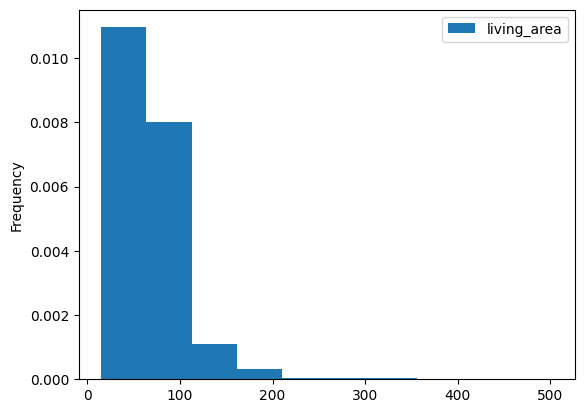

In [38]:
df[['living_area']].plot(kind='hist', density=True, stacked=False);

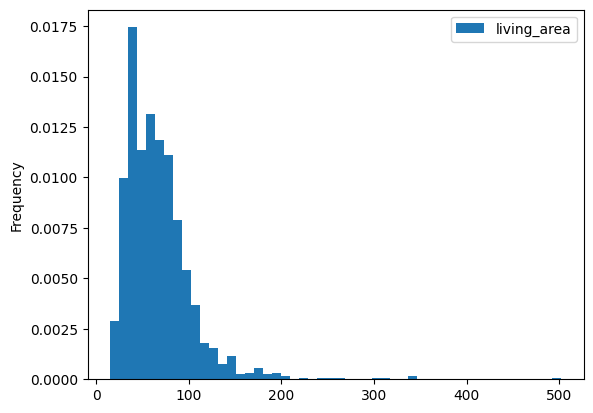

In [40]:
df[['living_area']].plot(kind='hist', bins=50, density=True, stacked=False);

In [41]:
df['price']

id
19324990    14950000
19325173     6795000
19102415    14995000
18956296     9450000
19158120    19800000
              ...   
18987175     3595000
18976122     6850000
18941998    15495000
18669396     4095000
16998076     3995000
Name: price, Length: 1252, dtype: int32

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coordinate                     1252 non-null   object 
 1   address                        1252 non-null   object 
 2   location_name                  1252 non-null   object 
 3   typeSummary                    1252 non-null   object 
 4   ongoing_bidding                1252 non-null   bool   
 5   foreclosure                    1252 non-null   bool   
 6   price                          1252 non-null   int32  
 7   price_per_area                 1252 non-null   int32  
 8   has_price_change               1252 non-null   bool   
 9   rooms                          1249 non-null   object 
 10  fee                            1252 non-null   int32  
 11  age                            1252 non-null   int64  
 12  deactivated_before_open_house  1252 n

In [19]:
#df['price']=df['price'].replace('Prissaknas', np.nan)

In [20]:
df['price'].apply(check_int).dropna().value_counts()

Series([], Name: price, dtype: int64)

In [21]:
col = df.loc[:, ['price']]

In [22]:
col.value_counts()

price   
3995000     40
2995000     28
3495000     24
4995000     23
5495000     22
            ..
7900000      1
4145000      1
3980000      1
8000000      1
78000000     1
Length: 371, dtype: int64

In [23]:
col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1252 non-null   int32
dtypes: int32(1)
memory usage: 14.7 KB


In [24]:
count = col.loc[col['price'] == 0,'price']
count.count()

10

In [25]:
col.values.mean()

5922123.722044729

In [26]:
col.median()

price   4597500
dtype: float64

In [27]:
col.quantile(.5)

price   4597500
Name: 0.5, dtype: float64

array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

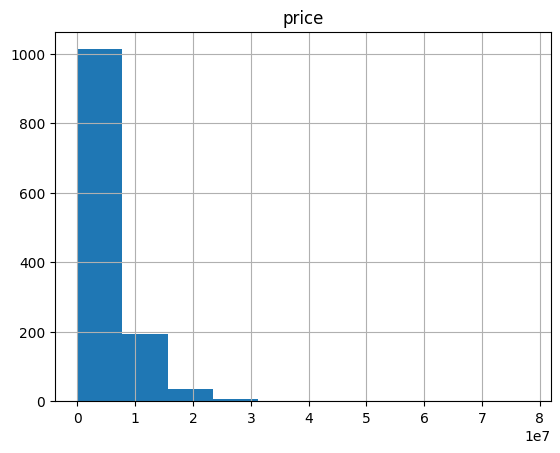

In [28]:
col.hist()

In [29]:
iqr=col.quantile(.75)-col.quantile(.25)
iqr

price   3580000
dtype: float64

In [30]:
col.max()

price    78000000
dtype: int32

In [31]:
col.min()

price    0
dtype: int32

In [32]:
col=col.reset_index(drop=True)

In [33]:
pd.options.display.float_format = '{:.0f}'.format

In [34]:
col.describe()

,price
count,1252
mean,5922124
std,4679745
min,0
25%,3395000
50%,4597500
75%,6975000
max,78000000


<AxesSubplot: ylabel='Frequency'>

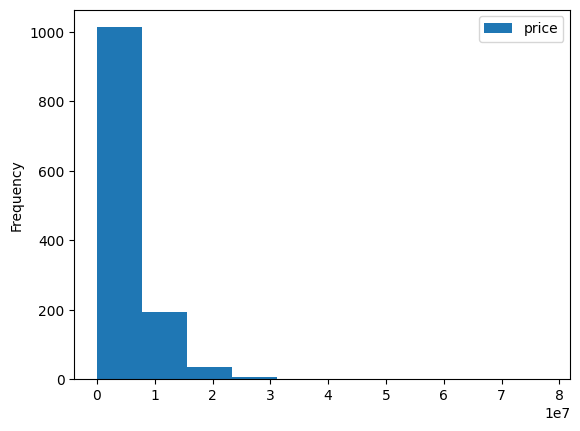

In [35]:
col.plot(kind='hist')

In [36]:
col.sort_values(by='price')

,price
853,0
352,0
567,0
626,0
383,0
...,...
367,30000000
434,37000000
525,39500000
1206,47500000


In [37]:
s=col['price']
s.value_counts()

3995000     40
2995000     28
3495000     24
4995000     23
5495000     22
            ..
9000000      1
12975000     1
8475000      1
6595000      1
10855000     1
Name: price, Length: 371, dtype: int64

col.astype(float)
col.astype(int)

# select only columns with integer data type
columns = col.select_dtypes(include=[np.number])
columns.info()

In [38]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1252 entries, 0 to 1251
Series name: price
Non-Null Count  Dtype
--------------  -----
1252 non-null   int32
dtypes: int32(1)
memory usage: 5.0 KB


df_string_rows = df2.select_dtypes(include=['object'])
df_string_rows

In [39]:
df['price'].apply(check_int).dropna().value_counts()

Series([], Name: price, dtype: int64)

In [40]:
df['living_area'].apply(check_int).dropna().value_counts()

Series([], Name: living_area, dtype: int64)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coordinate                     1252 non-null   object 
 1   address                        1252 non-null   object 
 2   location_name                  1252 non-null   object 
 3   typeSummary                    1252 non-null   object 
 4   ongoing_bidding                1252 non-null   bool   
 5   foreclosure                    1252 non-null   bool   
 6   price                          1252 non-null   int32  
 7   price_per_area                 1252 non-null   int32  
 8   has_price_change               1252 non-null   bool   
 9   rooms                          1249 non-null   object 
 10  fee                            1252 non-null   int32  
 11  age                            1252 non-null   int64  
 12  deactivated_before_open_house  1252 n

df2['price_per_area'].apply(np.isreal).value_counts()

df2['price_per_area'].str.contains('.*[A-Za-z].*', regex=True).value_counts()
s=df2['price_per_area']
#s=s.str.replace(' ','',regex=True).astype(int)
#s=pd.to_numeric(s,errors='coerce')
#s

pd.DataFrame(s)


r=df2.loc[df2['listingId']=='19330879']

pd.options.display.max_colwidth = 100
print(r['url'])

In [42]:
df[df['listingId'].isna()]['listingId']

Series([], Name: listingId, dtype: object)

df2.loc[df2['fee'].isna(),'fee']

In [43]:
df['listingId']

id
19324990    19324990
19325173    19325173
19102415    19102415
18956296    18956296
19158120    19158120
              ...   
18987175    18987175
18976122    18976122
18941998    18941998
18669396    18669396
16998076    16998076
Name: listingId, Length: 1252, dtype: object

ascii(df2['fee'].head(1).values[0].replace(' ',''))

df2.loc[df2['fee']=='\xa0','fee']

In [44]:
newone=df.loc[:, ['price', 'fee']]

In [45]:
newone

,price,fee
id,,
19324990,14950000,4761
19325173,6795000,5850
19102415,14995000,7909
18956296,9450000,2875
19158120,19800000,7999
...,...,...
18987175,3595000,2005
18976122,6850000,3267
18941998,15495000,7233


In [46]:
newone.loc[:,'price'].value_counts()

3995000     40
2995000     28
3495000     24
4995000     23
5495000     22
            ..
9000000      1
12975000     1
8475000      1
6595000      1
10855000     1
Name: price, Length: 371, dtype: int64

In [55]:
newone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1252 non-null   int32
 1   fee     1252 non-null   int32
dtypes: int32(2)
memory usage: 19.6 KB


<AxesSubplot: xlabel='price', ylabel='fee'>

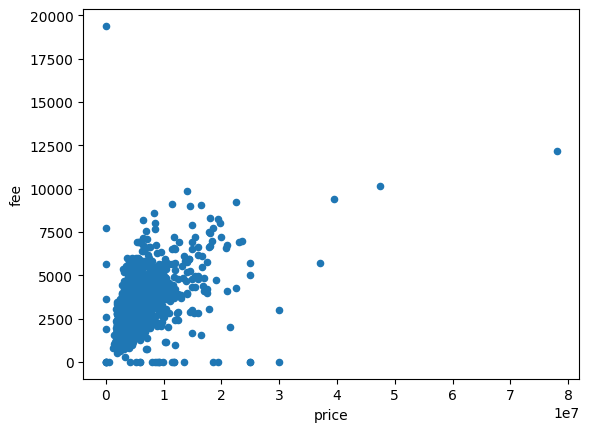

In [57]:
newone.plot.scatter(x='price',y='fee')

In [68]:
df.query("price > 70000000")

,coordinate,address,location_name,typeSummary,ongoing_bidding,foreclosure,price,price_per_area,has_price_change,rooms,fee,age,deactivated_before_open_house,small_image_url,medium_image_url,url,state_labels,visible_project_units,broker_agency_name,locations_string,should_highlight_showings,listingId,listingType,listingPackageType,listingState,listingStatus,price_change,area,date,balcony,elevator,patio,tenure_owned,living_area,supplemental_area
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18895298,"[59.3394966, 18.0697384]",Engelbrektsgatan 13,Stockholms kommun,Bostadsrättslägenhet,False,False,78000000,78000000,False,8,12156,143,False,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-8rum-ost...,[],0,Edward & Partners Fastighetsmäklare AB,"Östermalm, Stockholms kommun",False,18895298,common_listing,basic,active,for_sale,NaN,ostermalm,20221203,True,True,False,False,308,None


In [71]:
print(df[newone["price"] > 70000000]["url"])

id
18895298    https://www.hemnet.se/bostad/lagenhet-8rum-ost...
Name: url, dtype: object


In [62]:
newone.sort_values(ascending=False, by="price")

,price,fee
id,,
18895298,78000000,12156
19227179,47500000,10164
19278814,39500000,9378
19371155,37000000,5700
19309915,30000000,3026
...,...,...
19330879,0,0
19325738,0,7749
19256837,0,0
